In [112]:
!python -m pip install pandas openpyxl matplotlib

In [130]:
import pandas as pd
import numpy as np

In [131]:
df = pd.read_excel("data/Biertoto.xlsx")

In [132]:
df = df.dropna(subset=['Heim']).copy()

In [133]:
def home_draw_away_generic(home_goals, away_goals)->str:
    """
    A = away team won
    H = home team won
    D = draw
    """
    diff = home_goals - away_goals
    if pd.isnull(home_goals) or pd.isnull(away_goals):
        return np.nan
    if diff < 0:
        return 'A'
    elif diff > 0:
        return 'H'
    else:
        return 'D'


In [134]:
def home_draw_away(row):
    return home_draw_away_generic(row['Htore'], row['Gtore'])
    

In [135]:
def home_draw_away_uwe(row):
    return home_draw_away_generic(row['UHT'], row['UGT'])

In [136]:
def home_draw_away_schadix(row):
    return home_draw_away_generic(row['SHT'], row['SGT'])

In [156]:
def match_result_generic(home_goals_1, away_goals_1, home_goals_2, away_goals_2)->bool:
    if pd.isnull(home_goals_1) or pd.isnull(away_goals_1) or pd.isnull(home_goals_2) or pd.isnull(away_goals_2):
        return False
    try:
        return int(home_goals_1) == int(home_goals_2) and int(away_goals_1) == int(away_goals_2)
    except ValueError:
        return False

    

In [157]:
def same_goal_difference(home_goals_1, away_goals_1, home_goals_2, away_goals_2)->bool:
    if pd.isnull(home_goals_1) or pd.isnull(away_goals_1) or pd.isnull(home_goals_2) or pd.isnull(away_goals_2):
        return False
    try:
        return int(home_goals_1) - int(away_goals_1) == int(home_goals_2) - int(away_goals_2)
    except ValueError:
        return False

    

In [158]:
def same_goal_difference_uwe(row)->bool:
    return same_goal_difference(home_goals_1=row['UHT'], 
                                  away_goals_1=row['UGT'], 
                                  home_goals_2=row['Htore'], 
                                  away_goals_2=row['Gtore'])

In [159]:
def same_goal_difference_schadix(row)->bool:
    return same_goal_difference(home_goals_1=row['SHT'], 
                                  away_goals_1=row['SGT'],
                                  home_goals_2=row['Htore'], 
                                  away_goals_2=row['Gtore'])

In [160]:
def same_result_uwe(row)->bool:
    return match_result_generic(home_goals_1=row['UHT'], 
                                  away_goals_1=row['UGT'], 
                                  home_goals_2=row['Htore'], 
                                  away_goals_2=row['Gtore'])

In [161]:
def same_result_schadix(row)->bool:
    return match_result_generic(home_goals_1=row['SHT'], 
                                  away_goals_1=row['SGT'], 
                                  home_goals_2=row['Htore'], 
                                  away_goals_2=row['Gtore'])

In [162]:
def get_year(row)->int:
    """add 19 to string with split on / in case of 9x else add 20"""
    saison = row['Saison']
    first_year, second_year = saison.split('/')
    first_year = first_year.strip()
    if first_year.startswith('9'):
        return int("19"+first_year)
    else:
        return int("20"+first_year)
        

In [163]:
def calculate_points_generic(tendency:bool=False, 
                             same_goal_difference:bool=False, 
                             same_result:bool=False,
                            draw:bool=False)->int:
    result_points = 0
    if tendency:
        result_points += 2
    if same_goal_difference and not draw:
        result_points += 1
    if same_result:
        if not draw:
            result_points += 1
        else:
            result_point += 2
    return result_points
    

In [164]:
df['year'] = df.apply(get_year, axis=1)

In [165]:
df['tendenz'] = df.apply(home_draw_away, axis=1)

In [166]:
df['tendenz_uwe'] = df.apply(home_draw_away_uwe, axis=1)

In [167]:
df['tendenz_schadix'] = df.apply(home_draw_away_schadix, axis=1)

In [168]:
df['same_goal_uwe'] = df.apply(same_goal_difference_uwe, axis=1)

In [169]:
df['same_goal_schadix'] = df.apply(same_goal_difference_schadix, axis=1)

In [170]:
df['same_result_uwe'] = df.apply(same_result_uwe, axis=1)

In [171]:
df['same_result_schadix'] = df.apply(same_result_schadix, axis=1)

In [172]:
df['result_match_uwe_schadix'] = df.apply(lambda row: match_result_generic(row['UHT'], row['UGT'], row['SHT'], row['SGT']), axis=1)

In [173]:
df['points_uwe'] = df.apply(lambda row: calculate_points_generic(tendency=row['tendenz_uwe']==row['tendenz'],
                                                                 same_goal_difference=row['same_goal_uwe'],
                                                                 same_result=row['same_result_uwe']
                                                                ), axis=1)

In [174]:
df['points_schadix'] = df.apply(lambda row: calculate_points_generic(tendency=row['tendenz_schadix']==row['tendenz'],
                                                                 same_goal_difference=row['same_goal_schadix'],
                                                                 same_result=row['same_result_schadix']
                                                                ), axis=1)

In [224]:
def create_result_string(home_goals, guest_goals):
    if pd.isnull(home_goals) or pd.isnull(guest_goals):
        return np.nan
    else:
        return str(int(home_goals))+":"+str(int(guest_goals))
    

In [225]:
df['result_string']=df.apply(lambda row:str(int(row['Htore']))+":"+str(int(row['Gtore'])), axis=1)

In [229]:
df['result_string_uwe']=df.apply(lambda row: create_result_string(row['UHT'], row['UGT']), axis=1)

In [230]:
df['result_string_schadix']=df.apply(lambda row: create_result_string(row['SHT'], row['SGT']), axis=1)

In [231]:
df

,Heim,Gast,Htore,Gtore,UHT,UGT,SHT,SGT,Spieltag,Saison,...,same_goal_schadix,same_result_uwe,same_result_schadix,result_match_uwe_schadix,points_uwe,points_schadix,result_string,same_tendenz,result_string_uwe,result_string_schadix
0,SC Freiburg,Borussia Mönchengladbach,0.0,0.0,1.0,2.0,1.0,0.0,18,95/96,...,False,False,False,False,0,0,0:0,False,1:2,1:0
1,1. FC Kaiserslautern,Borussia Dortmund,1.0,1.0,0.0,4.0,0.0,1.0,18,95/96,...,False,False,False,False,0,0,1:1,True,0:4,0:1
2,TSV 1860 München,FC St. Pauli,2.0,0.0,2.0,1.0,2.0,1.0,18,95/96,...,False,False,False,True,2,2,2:0,True,2:1,2:1
3,Karlsruher SC,Eintracht Frankfurt,1.0,1.0,2.0,0.0,0.0,2.0,18,95/96,...,False,False,False,False,0,0,1:1,False,2:0,0:2
4,Hamburger SV,Bayern München,2.0,1.0,1.0,3.0,1.0,2.0,18,95/96,...,False,False,False,False,0,0,2:1,True,1:3,1:2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,Bayer 04 Leverkusen,VfL Wolfsburg,0.0,2.0,3.0,1.0,2.0,0.0,10,21/22,...,False,False,False,False,0,0,0:2,True,3:1,2:0
7889,Borussia Dortmund,1. FC Köln,2.0,0.0,3.0,1.0,3.0,1.0,10,21/22,...,True,False,False,True,3,3,2:0,True,3:1,3:1
7890,Eintracht Frankfurt,RB Leipzig,1.0,1.0,1.0,3.0,0.0,3.0,10,21/22,...,False,False,False,False,0,0,1:1,True,1:3,0:3
7891,FC Augsburg,VfB Stuttgart,4.0,1.0,2.0,1.0,1.0,1.0,10,21/22,...,False,False,False,False,2,0,4:1,False,2:1,1:1


In [177]:
df[df['SHT'].isna()]

,Heim,Gast,Htore,Gtore,UHT,UGT,SHT,SGT,Spieltag,Saison,...,tendenz_uwe,tendenz_schadix,same_goal_uwe,same_goal_schadix,same_result_uwe,same_result_schadix,result_match_uwe_schadix,points_uwe,points_schadix,result_string
1620,Energie Cottbus,Vfl Wolfsburg,0.0,0.0,3.0,1.0,NaN,NaN,28,00/01,...,H,NaN,False,False,False,False,False,0,0,0:0
1621,Eintracht Frankfurt,Bayer Leverkusen,1.0,3.0,0.0,3.0,NaN,NaN,28,00/01,...,A,NaN,False,False,False,False,False,2,0,1:3
1622,1. FC Köln,SpVgg Unterhaching,1.0,1.0,4.0,1.0,NaN,NaN,28,00/01,...,H,NaN,False,False,False,False,False,0,0,1:1
1623,1860 München,Vfl Bochum,2.0,4.0,3.0,0.0,NaN,NaN,28,00/01,...,H,NaN,False,False,False,False,False,0,0,2:4
1624,Werder Bremen,Hertha BSC Berlin,3.0,1.0,2.0,0.0,NaN,NaN,28,00/01,...,H,NaN,True,False,False,False,False,3,0,3:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,Arminia Bielefeld,RB Leipzig,0.0,1.0,0.0,NaN,NaN,2.0,26,20/21,...,NaN,NaN,False,False,False,False,False,0,0,0:1
7758,1. FC Köln,RB Leipzig,2.0,1.0,1.0,3.0,NaN,NaN,30,20/21,...,A,NaN,False,False,False,False,False,0,0,2:1
7759,FC Bayern München,Bayer 04 Leverkusen,2.0,0.0,3.0,1.0,NaN,NaN,30,20/21,...,H,NaN,True,False,False,False,False,3,0,2:0
7760,Eintracht Frankfurt,FC Augsburg,2.0,0.0,2.0,1.0,NaN,NaN,30,20/21,...,H,NaN,False,False,False,False,False,2,0,2:0


In [178]:
df_points_sum = df.groupby('year').sum(['points_schadix', 'points_uwe'])[['points_schadix', 'points_uwe']]

In [179]:
df_points_sum

,points_schadix,points_uwe
year,,
1995,131,142
1996,357,372
1997,322,356
1998,338,394
1999,375,372
2000,306,375
2001,340,389
2002,325,371
2003,422,365


### Gesamtpunkte im Laufe der Zeit

In [181]:
df_sum_points = df_points_sum.cumsum()

<AxesSubplot:xlabel='year'>

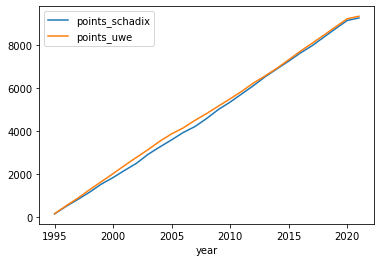

In [184]:
df_points_sum.cumsum().plot()

### Gesamtpunke-Abstand Uwe-Schadix

<AxesSubplot:xlabel='year'>

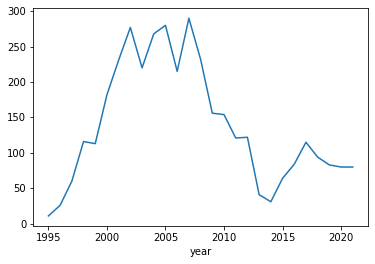

In [191]:
df_sum_points['point_difference'] = df_sum_points['points_uwe'] - df_sum_points['points_schadix']
df_sum_points['point_difference'].plot()

### Wie haeufig gleiche Ergebnisse getippt im Laufe der Zeit

In [192]:
df_same_tipps_over_time = df.groupby('year').sum(['result_match_uwe_schadix'])[['result_match_uwe_schadix']][:-1]

In [193]:
df_same_tipps_over_time['avg_10'] = df_same_tipps_over_time.result_match_uwe_schadix.rolling(10, min_periods=0).mean()

<AxesSubplot:xlabel='year'>

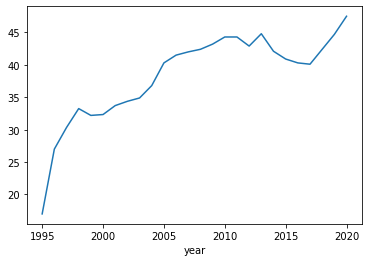

In [194]:
df_same_tipps_over_time['avg_10'].plot()

In [195]:
df['same_tendenz'] = df.apply(lambda row: row['tendenz_uwe'] == row['tendenz_schadix'], axis=1)

In [196]:
df_same_tendenz = df.groupby('year').sum(['same_tendenz'])[['same_tendenz']][:-1]

<AxesSubplot:xlabel='year'>

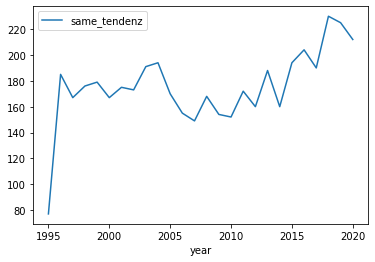

In [197]:
df_same_tendenz.plot()

In [198]:
df_same_tendenz['avg_3'] = df_same_tendenz.same_tendenz.rolling(3, min_periods=0).mean()

In [199]:
df_same_tendenz['avg_5'] = df_same_tendenz.same_tendenz.rolling(5, min_periods=0).mean()

<AxesSubplot:xlabel='year'>

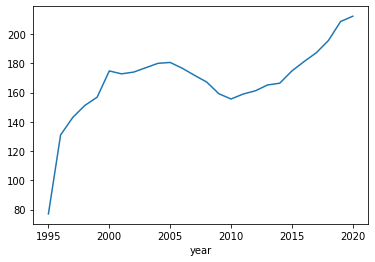

In [200]:
df_same_tendenz['avg_5'].plot()

Probability of results

In [249]:
results_count = df.groupby('result_string')['result_string'].count().sort_values()
results_sum = results_count.sum()
df_results_count = pd.DataFrame(index=results_count.index, data=results_count.values, columns=['count'])
# results_count['probability_result'] = results_count['']
df_results_count['probability_result'] = df_results_count['count'] / results_sum
float(df_results_count[df_results_count.index == '0:0']['probability_result'])

0.06714810591663499

In [290]:
a = df_results_count[df_results_count.index == '5:5']['probability_result']
len(a)

0

In [297]:
def get_probability_number(result_string):
    # print(result_string)
    if pd.isnull(result_string):
        return np.nan
    try:
        prob = df_results_count[df_results_count.index == result_string]['probability_result']
        if len(prob) == 0:
            return 1
        return 1 - float(prob)
    except KeyError as ke:
        return np.nan


In [298]:
df['probability_count_uwe'] = df.apply(lambda row:get_probability_number(row['result_string_uwe']), axis=1)

In [299]:
df['probability_count_schadix'] = df.apply(lambda row:get_probability_number(row['result_string_schadix']), axis=1)

In [301]:
print(f"Uwe: {df['probability_count_uwe'].sum()}")
print(f"Schadix: {df['probability_count_schadix'].sum()}")

Uwe: 7331.625364246801
Schadix: 7169.23223109084


Probability of results with tips combined

max points spieltag

spieltag lost even most correct tendencies

Wie haeufig vergessen zu tippen (gesamt und ueber zeit)